AutoEncoder 단어에서 Auto는 자동이 아니라 나 자신, self라는 뜻
+ 인코더와 디코더를 둘다 진행 
+ 정보와 노이즈로 구성되어 있는 이미지에서 노이즈를 지우고 정보만 남김 
+ 오토 인코더는 input데이터들의 정보가 모여 있는 n 차원의 바운더리를 만들고 오토 인코더를 통과한 이미지를 정보만의 바운더리 안으로 넣음(?)
- 그냥 쉽게 얘기해 노이즈를 지우는 필터 역할  

# 오토 인코더 
- 오토인코더는 비지도unsupervised 방식으로 훈련된 인공 신경망으로, 먼저 데이터에 인코딩 된 표현을 학습한 다음, 학습 된 인코딩 표현에서 입력 데이터를 (가능한한 가깝게) 생성하는 것을 목표로 한다. 따라서, 오토인코더의 출력은 입력에 대한 예측이다.
- 


**오토 인코더 주요 응용**
- 이상 감지, 노이즈 제거 
- 오토인코더 기반의 이상 탐지란, 정상 데이터를 오토인코더를 통하여 원래의 데이터보다 작은 차원의 잠재 공간(latent space)로 압축 후에 다시 복원하고, 복원된 데이터와 원본 데이터의 차이를 비교함으로써 이상 탐지를 수행하는 방법

-  이때 정상 데이터를 저차원으로 압축(encoding)하는 부분을 인코더라고 하며, 압축된 샘플을 다시 원래의 차원으로 복원(decoding)하는 부분은 디코더라고 합니다. 그리고 인코더에 의해 데이터가 압축되어 나타나는 잠재 공간에서의 데이터의 표현형을 잠재 변수(latent variable)라고 합니다. 오토인코더는 원본 데이터와 복원된 데이터의 차이를 최소화하는 과정을 통해 학습하며, 그 과정에서 학습 데이터의 특징이 자연스럽게 추출되어 잠재 공간이 구성됩니다.  

**차원 변화**
- 오토 인코더는 차원을 점차 축소 시키고 다시 복원
- 데이터는 차원이 축소되고 복원하는 과정을 통해 이상을 탐지 가능 
- 이상 데이터는 복원 과정에서 잘 복원되지 않고, 정상 데이터는 잘 됨 
- 이를 원본 데이터와 비교 하여 노이즈를 제거 하거나, 혹은 차이나느 정도를 이용 해 이상 데이터 판별 가능 

**PCA - 오토인코더**
- PCA는 차원 축소를 하는 기법으로  오토 인코더와 유사 하지만 선형적인 관계만 분석이 가능하다는 단점이 있다
- 하지만 오토 인코더는 차원간의 비선형적인 관계 역시 학습이 가능 해 정확도가 높다 


**Unimodal normality case & Multimodal normality case**
- Unimodal normality case는 데이터에서 나타나는 정상 패턴이 한개라고 가정하는 경우 (aka one-class classificationo) 
- Multimodal normality case 는 정상 패턴이 여러개 
   - 대부분의 데이터의 경우 정상 패턴이 여러개 이므로 Multimodal noramlity case가 더 일반적 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# 데이터 로딩 

In [ ]:
(x_train,_), (x_test,_) = mnist.load_data()

# 전처리 

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

데이터 확인 

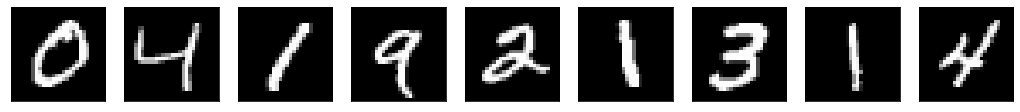

In [ ]:
n = 10 
plt.figure(figsize=(20,2))
for i in range(1,n):
  ax = plt.subplot(1,n,i)
  plt.imshow(x_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# 모델 정의와 학습 실행 

In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 784))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(784, activation = 'sigmoid')) # 2진 분류 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')


model.fit(x_train, x_train, epochs = 100, batch_size = 256)

## 결과 확인 

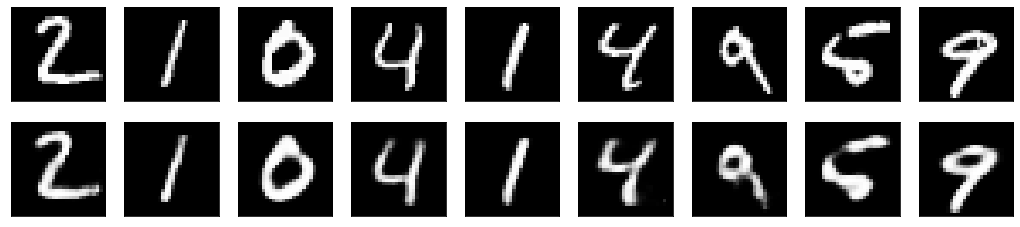

In [ ]:
reconstruted = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Auto Encoder 응용 

## 디노이징 오토 인코더 
- 노이즈 된 이미지를 원복 
- 인풋에 노이즈가 껴 있는 이미지를 넣고, 아웃풋에 원본 이미지를 넣음 
- 노이즈 이미지와 깨끗한 이미지를 학습
- 노이즈 제거 역할 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

### 데이터 로드 및 전처리

In [ ]:
(x_train,_), (x_test,_) = mnist.load_data()

전처리

In [ ]:
x_train  = x_train.astype('float32')/255
x_test  = x_test.astype('float32')/255

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

### 임의의 노이즈 추가 

In [ ]:
noise = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)

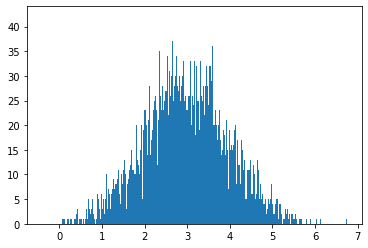

In [ ]:
plt.hist(noise,bins=1000)
plt.show()

In [ ]:
#원본 데이터에 노이즈 추가 
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale =1, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale =1, size = x_test.shape)

#최대 최소 조절 
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

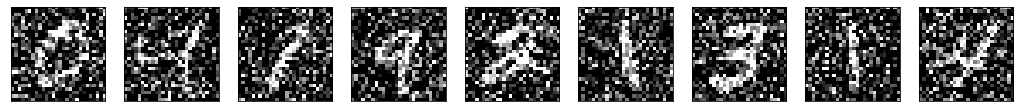

In [ ]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 모델 정의
- 첫번째 오토 인코더와 달리 여기서는 인풋에 노이즈가 껴 있는 데이터를 넣음 
- 오토 인코더는 노이즈가 껴있는 데이터와 클린한 데이터를 학습 
- 추후 predict에서 노이즈를 제거 해 줌 
- 여기서 포인트는 네트워크 구조 

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(x_train_noisy, x_train, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)

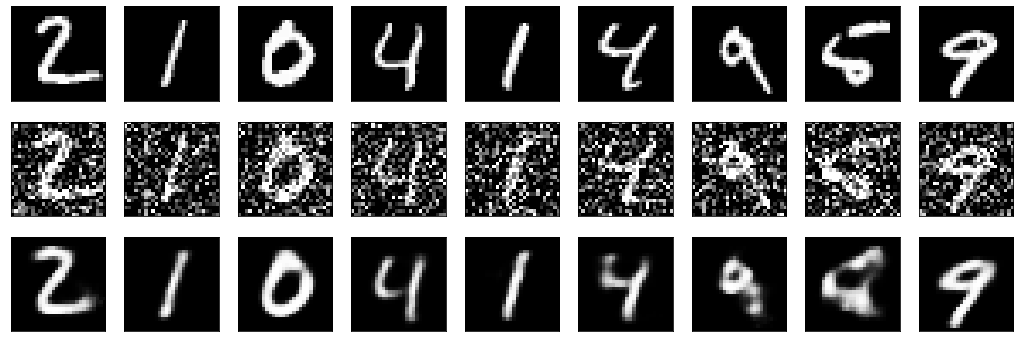

In [ ]:
decoded_imgs = model.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Super Resolution <- 해상도 높이기 

### 데이터 로드 

In [ ]:
(x_train,_), (x_test,_) = mnist.load_data()

전처리

In [ ]:
x_train  = x_train.astype('float32')/255
x_test  = x_test.astype('float32')/255

### 데이터 해상도 저하 

In [ ]:
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)


reduced_x_train = shrink(x_train, 14, 14)
reduced_x_test = shrink(x_test, 14, 14)
print(reduced_x_train.shape)
print(reduced_x_test.shape)


(60000, 14, 14)
(10000, 14, 14)


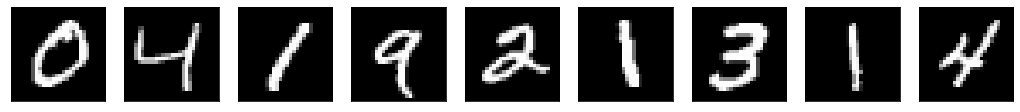

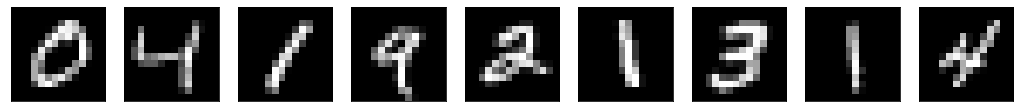

In [ ]:
# 데이터 확인 
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 모델 

In [ ]:
reduced_x_train = reduced_x_train.reshape(reduced_x_train.shape[0], 14*14)
reduced_x_test = reduced_x_test.reshape(reduced_x_test.shape[0], 14*14)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [ ]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_x_train, x_train, epochs=50, batch_size=256, validation_split=0.1)

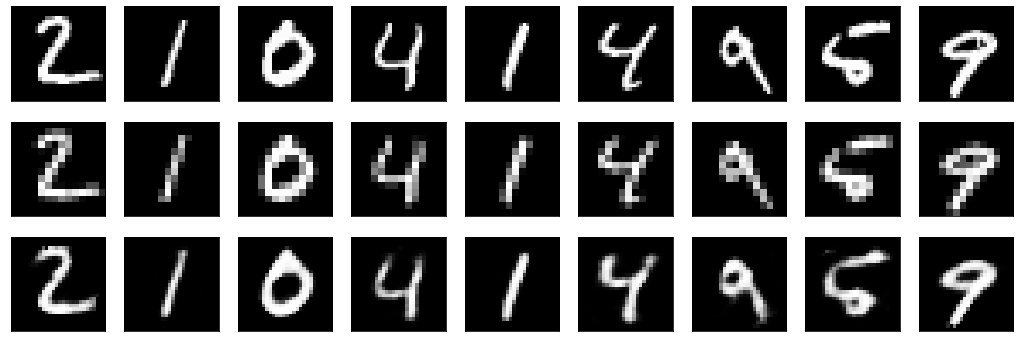

In [ ]:
# 결과 확인
super_resolutioned = model.predict(reduced_x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_x_test[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()